# Εισαγωγή στην Πιθανότητα και τη Στατιστική
Σε αυτό το σημειωματάριο, θα εξετάσουμε μερικές από τις έννοιες που έχουμε συζητήσει προηγουμένως. Πολλές έννοιες από την πιθανότητα και τη στατιστική εκπροσωπούνται επαρκώς σε μεγάλες βιβλιοθήκες για επεξεργασία δεδομένων στην Python, όπως οι `numpy` και `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Τυχαίες Μεταβλητές και Κατανομές
Ας ξεκινήσουμε με τη δειγματοληψία 30 τιμών από μια ομοιόμορφη κατανομή από το 0 έως το 9. Θα υπολογίσουμε επίσης τον μέσο όρο και τη διακύμανση.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Για να εκτιμήσουμε οπτικά πόσες διαφορετικές τιμές υπάρχουν στο δείγμα, μπορούμε να σχεδιάσουμε το **ιστόγραμμα**:


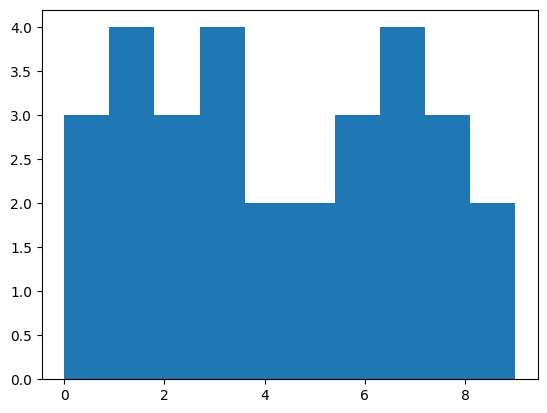

In [119]:
plt.hist(sample)
plt.show()

## Ανάλυση Πραγματικών Δεδομένων

Ο μέσος όρος και η διασπορά είναι πολύ σημαντικά όταν αναλύουμε δεδομένα από τον πραγματικό κόσμο. Ας φορτώσουμε τα δεδομένα για τους παίκτες του μπέιζμπολ από [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


> Χρησιμοποιούμε ένα πακέτο που ονομάζεται [**Pandas**](https://pandas.pydata.org/) εδώ για ανάλυση δεδομένων. Θα μιλήσουμε περισσότερο για το Pandas και τη δουλειά με δεδομένα στην Python αργότερα σε αυτό το μάθημα.

Ας υπολογίσουμε τις μέσες τιμές για την ηλικία, το ύψος και το βάρος:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Τώρα ας επικεντρωθούμε στο ύψος και να υπολογίσουμε την τυπική απόκλιση και τη διασπορά:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Εκτός από τον μέσο όρο, έχει νόημα να εξετάσουμε τη διάμεση τιμή και τα τεταρτημόρια. Μπορούν να απεικονιστούν χρησιμοποιώντας ένα **διάγραμμα κουτιού**:


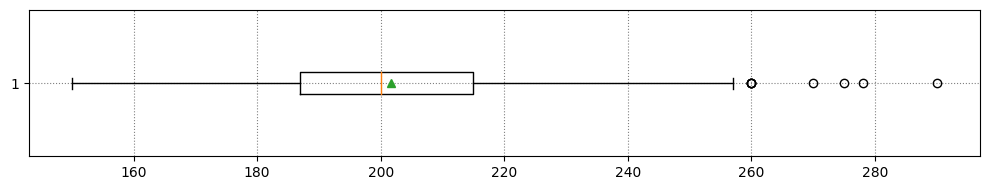

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Μπορούμε επίσης να δημιουργήσουμε διαγράμματα κουτιού για υποσύνολα του συνόλου δεδομένων μας, για παράδειγμα, ομαδοποιημένα ανά ρόλο παίκτη.


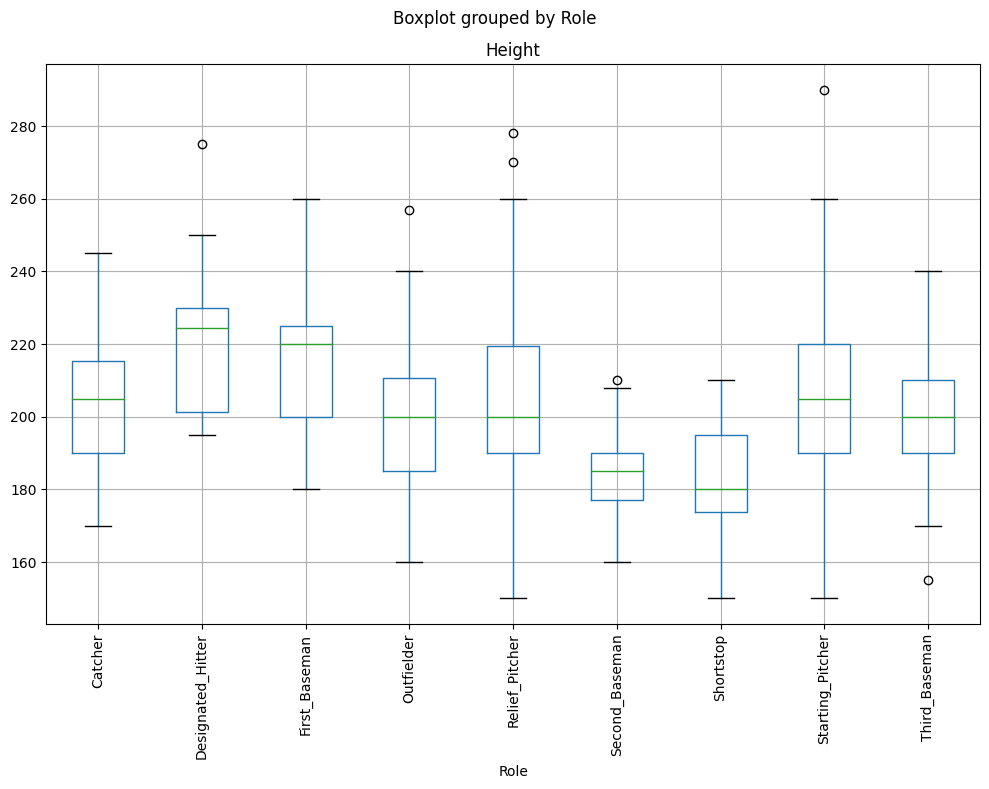

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Σημείωση**: Αυτό το διάγραμμα υποδεικνύει ότι, κατά μέσο όρο, τα ύψη των παικτών πρώτης βάσης είναι μεγαλύτερα από τα ύψη των παικτών δεύτερης βάσης. Αργότερα θα μάθουμε πώς μπορούμε να ελέγξουμε αυτήν την υπόθεση πιο επίσημα και πώς να αποδείξουμε ότι τα δεδομένα μας είναι στατιστικά σημαντικά για να το δείξουμε αυτό.  

Η ηλικία, το ύψος και το βάρος είναι όλα συνεχείς τυχαίες μεταβλητές. Τι πιστεύετε ότι είναι η κατανομή τους; Ένας καλός τρόπος για να το ανακαλύψετε είναι να σχεδιάσετε το ιστόγραμμα των τιμών:


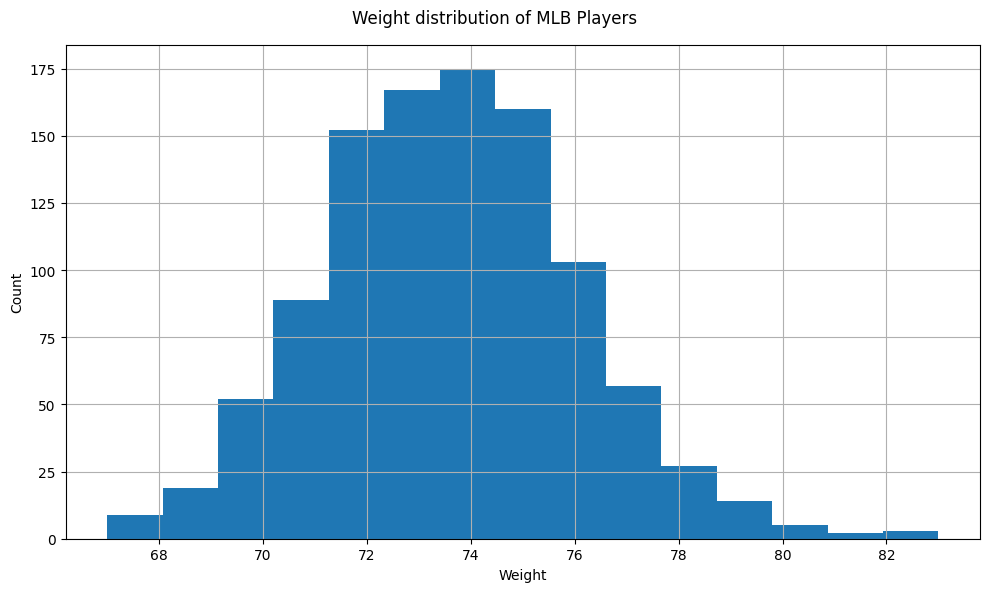

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Κανονική Κατανομή

Ας δημιουργήσουμε ένα τεχνητό δείγμα βαρών που ακολουθεί μια κανονική κατανομή με τον ίδιο μέσο όρο και διακύμανση όπως τα πραγματικά μας δεδομένα:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

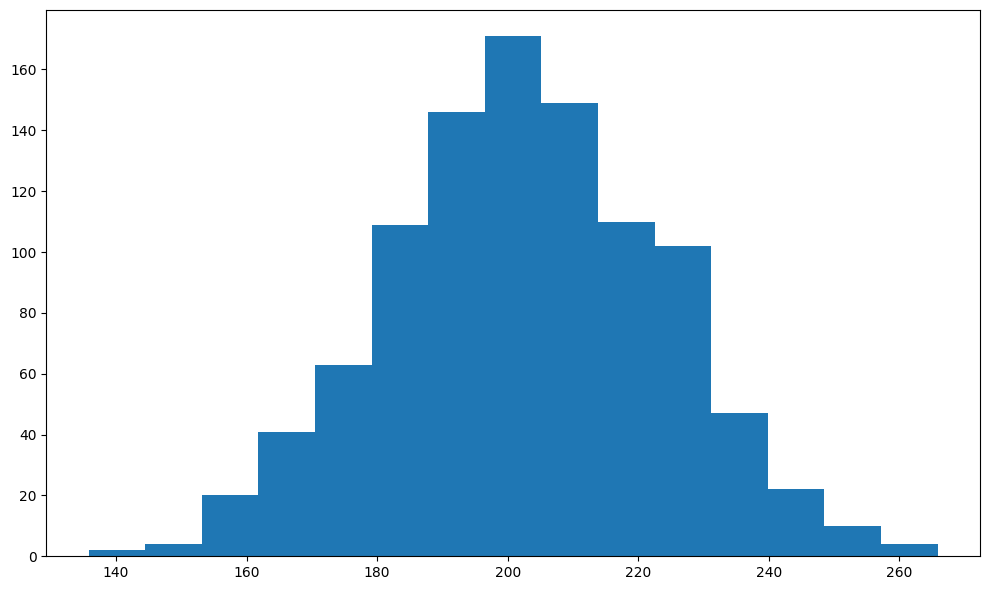

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

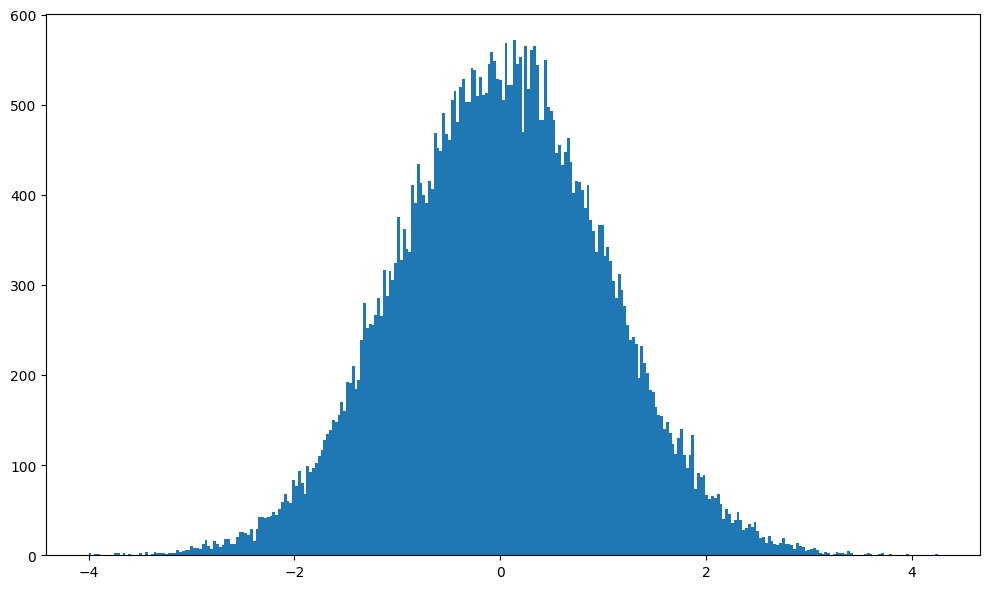

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Δεδομένου ότι οι περισσότερες τιμές στην πραγματική ζωή κατανέμονται κανονικά, δεν πρέπει να χρησιμοποιούμε έναν ομοιόμορφο γεννήτορα τυχαίων αριθμών για να δημιουργήσουμε δείγματα δεδομένων. Δείτε τι συμβαίνει αν προσπαθήσουμε να δημιουργήσουμε βάρη με μια ομοιόμορφη κατανομή (δημιουργημένη από το `np.random.rand`):


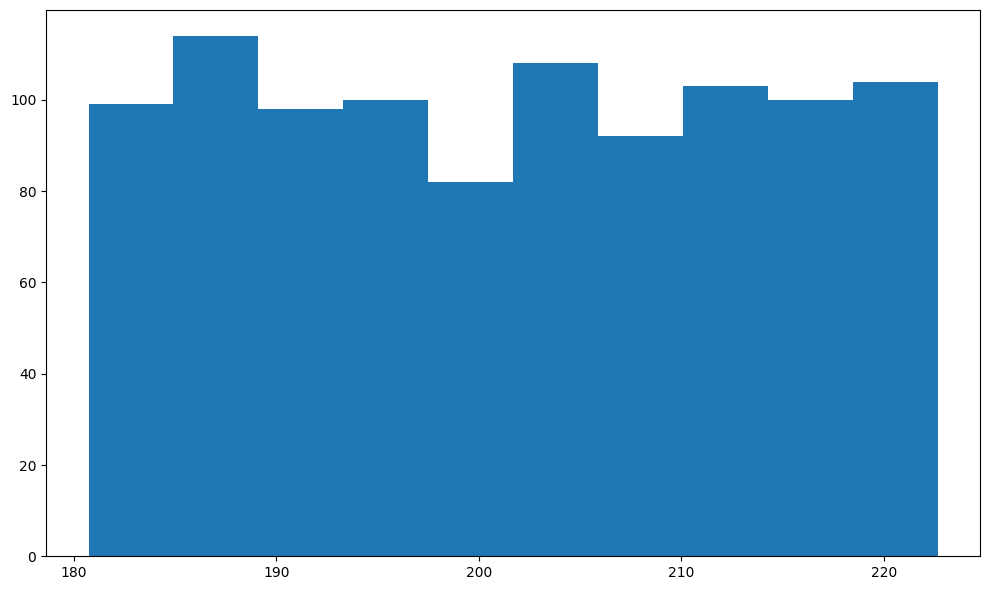

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Διαστήματα Εμπιστοσύνης

Ας υπολογίσουμε τώρα τα διαστήματα εμπιστοσύνης για τα βάρη και τα ύψη των παικτών του μπέιζμπολ. Θα χρησιμοποιήσουμε τον κώδικα [από αυτήν τη συζήτηση στο stackoverflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Έλεγχος Υποθέσεων

Ας εξερευνήσουμε τους διαφορετικούς ρόλους στο σύνολο δεδομένων των παικτών του μπέιζμπολ:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Μπορούμε να δούμε ότι τα διαστήματα δεν επικαλύπτονται.

Ένας στατιστικά πιο σωστός τρόπος για να αποδείξουμε την υπόθεση είναι να χρησιμοποιήσουμε ένα **t-test του Student**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Οι δύο τιμές που επιστρέφονται από τη συνάρτηση `ttest_ind` είναι:
* Η p-τιμή μπορεί να θεωρηθεί ως η πιθανότητα δύο κατανομών να έχουν τον ίδιο μέσο όρο. Στην περίπτωσή μας, είναι πολύ χαμηλή, που σημαίνει ότι υπάρχουν ισχυρές ενδείξεις που υποστηρίζουν ότι οι πρώτοι βάσεις είναι ψηλότεροι.
* Η t-τιμή είναι η ενδιάμεση τιμή της κανονικοποιημένης διαφοράς μέσων όρων που χρησιμοποιείται στο t-test και συγκρίνεται με μια οριακή τιμή για μια δεδομένη τιμή εμπιστοσύνης.


## Προσομοίωση Κανονικής Κατανομής με το Θεώρημα Κεντρικού Ορίου

Ο ψευδοτυχαίος γεννήτορας στην Python έχει σχεδιαστεί για να μας δίνει μια ομοιόμορφη κατανομή. Αν θέλουμε να δημιουργήσουμε έναν γεννήτορα για κανονική κατανομή, μπορούμε να χρησιμοποιήσουμε το θεώρημα κεντρικού ορίου. Για να πάρουμε μια τιμή με κανονική κατανομή, απλώς θα υπολογίσουμε τον μέσο όρο ενός δείγματος που παράγεται ομοιόμορφα.


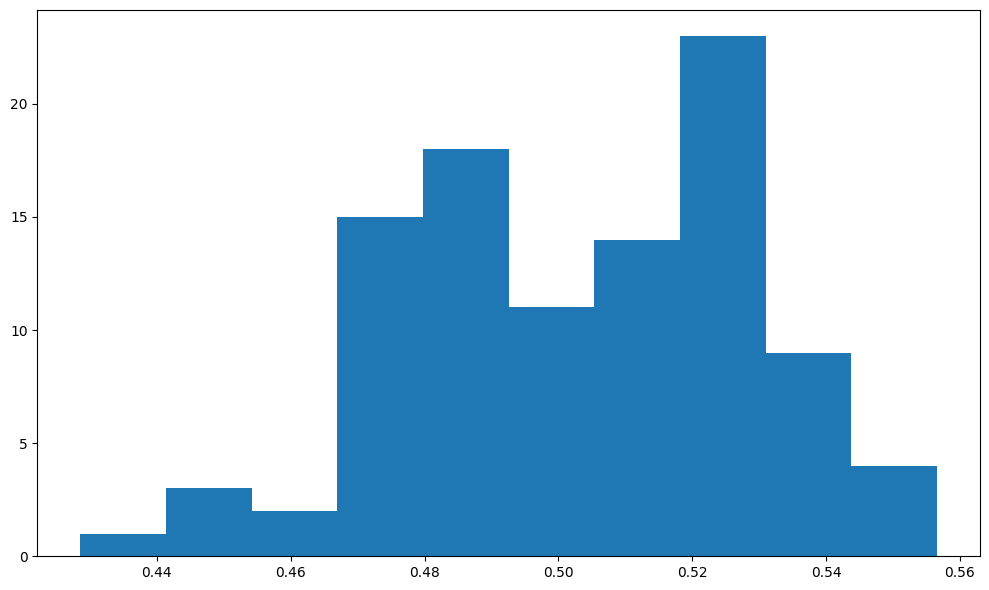

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Συσχέτιση και η Κακόβουλη Εταιρεία Μπέιζμπολ

Η συσχέτιση μας επιτρέπει να βρούμε σχέσεις μεταξύ ακολουθιών δεδομένων. Στο παράδειγμά μας, ας υποθέσουμε ότι υπάρχει μια κακόβουλη εταιρεία μπέιζμπολ που πληρώνει τους παίκτες της ανάλογα με το ύψος τους - όσο πιο ψηλός είναι ο παίκτης, τόσο περισσότερα χρήματα λαμβάνει. Ας υποθέσουμε ότι υπάρχει μια βασική αμοιβή των $1000, και ένα επιπλέον μπόνους από $0 έως $100, ανάλογα με το ύψος. Θα πάρουμε τους πραγματικούς παίκτες από το MLB και θα υπολογίσουμε τους φανταστικούς μισθούς τους:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Ας υπολογίσουμε τώρα τη συνδιακύμανση και τη συσχέτιση αυτών των ακολουθιών. Η `np.cov` θα μας δώσει έναν λεγόμενο **πίνακα συνδιακύμανσης**, ο οποίος είναι μια επέκταση της συνδιακύμανσης σε πολλαπλές μεταβλητές. Το στοιχείο $M_{ij}$ του πίνακα συνδιακύμανσης $M$ είναι η συσχέτιση μεταξύ των εισόδων $X_i$ και $X_j$, και οι διαγώνιες τιμές $M_{ii}$ είναι η διακύμανση του $X_{i}$. Παρομοίως, η `np.corrcoef` θα μας δώσει τον **πίνακα συσχέτισης**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


Μια συσχέτιση ίση με 1 σημαίνει ότι υπάρχει μια ισχυρή **γραμμική σχέση** μεταξύ δύο μεταβλητών. Μπορούμε να δούμε οπτικά τη γραμμική σχέση σχεδιάζοντας τη μία τιμή σε σχέση με την άλλη:


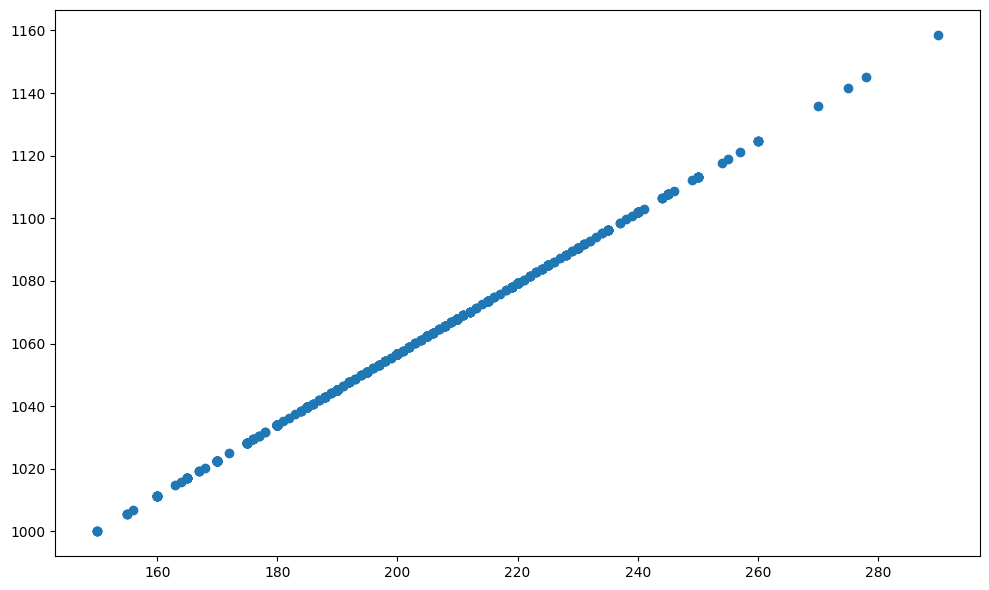

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Ας δούμε τι συμβαίνει αν η σχέση δεν είναι γραμμική. Υποθέστε ότι η εταιρεία μας αποφάσισε να κρύψει την προφανή γραμμική εξάρτηση μεταξύ υψών και μισθών, και εισήγαγε κάποια μη γραμμικότητα στον τύπο, όπως το `sin`:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


Σε αυτή την περίπτωση, η συσχέτιση είναι ελαφρώς μικρότερη, αλλά παραμένει αρκετά υψηλή. Τώρα, για να κάνουμε τη σχέση ακόμα λιγότερο προφανή, ίσως θέλουμε να προσθέσουμε λίγη επιπλέον τυχαιότητα προσθέτοντας κάποια τυχαία μεταβλητή στον μισθό. Ας δούμε τι συμβαίνει:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


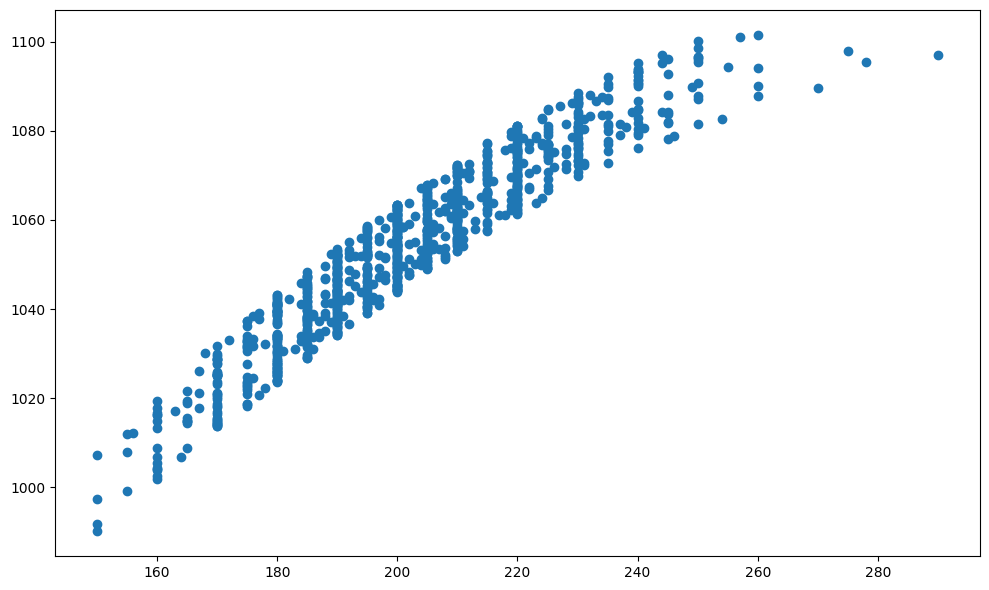

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Μπορείς να μαντέψεις γιατί οι τελείες ευθυγραμμίζονται σε κάθετες γραμμές έτσι;

Έχουμε παρατηρήσει τη συσχέτιση μεταξύ μιας τεχνητά σχεδιασμένης έννοιας όπως ο μισθός και της παρατηρούμενης μεταβλητής *ύψος*. Ας δούμε επίσης αν οι δύο παρατηρούμενες μεταβλητές, όπως το ύψος και το βάρος, συσχετίζονται μεταξύ τους:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Δυστυχώς, δεν λάβαμε κανένα αποτέλεσμα - μόνο κάποιες περίεργες τιμές `nan`. Αυτό συμβαίνει επειδή ορισμένες από τις τιμές στη σειρά μας είναι ακαθόριστες, που αναπαρίστανται ως `nan`, γεγονός που καθιστά το αποτέλεσμα της πράξης επίσης ακαθόριστο. Κοιτάζοντας τον πίνακα, μπορούμε να δούμε ότι η στήλη `Weight` είναι η προβληματική, επειδή ο αυτοσυσχετισμός μεταξύ των τιμών του `Height` έχει υπολογιστεί.

> Αυτό το παράδειγμα δείχνει τη σημασία της **προετοιμασίας δεδομένων** και του **καθαρισμού**. Χωρίς σωστά δεδομένα, δεν μπορούμε να υπολογίσουμε τίποτα.

Ας χρησιμοποιήσουμε τη μέθοδο `fillna` για να συμπληρώσουμε τις ελλιπείς τιμές και να υπολογίσουμε τη συσχέτιση:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Υπάρχει πράγματι μια συσχέτιση, αλλά όχι τόσο ισχυρή όσο στο τεχνητό μας παράδειγμα. Πράγματι, αν κοιτάξουμε το διάγραμμα διασποράς της μιας τιμής σε σχέση με την άλλη, η σχέση θα ήταν πολύ λιγότερο προφανής:


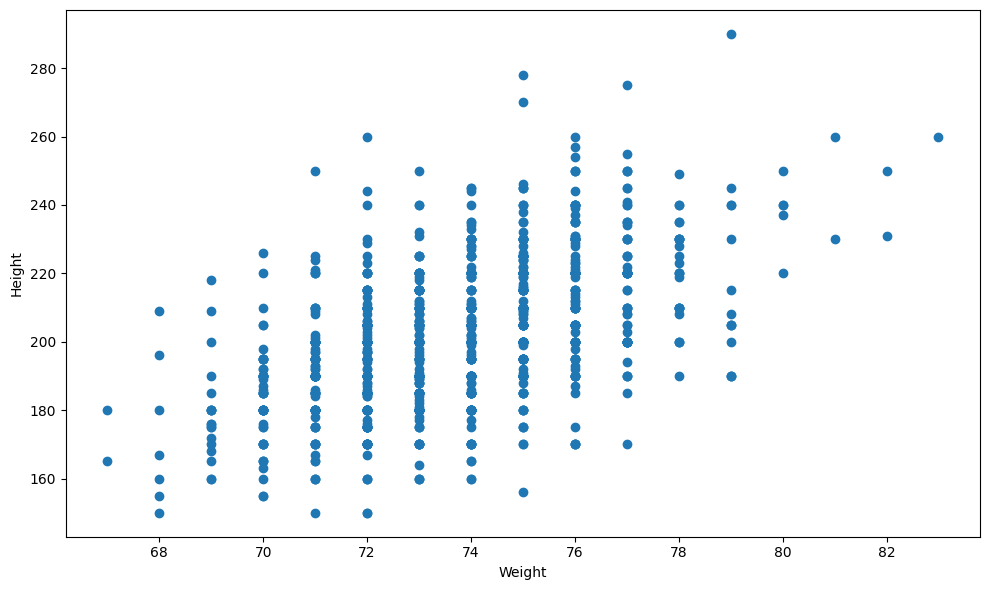

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Συμπέρασμα

Σε αυτό το σημειωματάριο μάθαμε πώς να εκτελούμε βασικές λειτουργίες στα δεδομένα για να υπολογίσουμε στατιστικές συναρτήσεις. Τώρα γνωρίζουμε πώς να χρησιμοποιούμε ένα αξιόπιστο σύνολο μαθηματικών και στατιστικών εργαλείων για να αποδείξουμε κάποιες υποθέσεις, καθώς και πώς να υπολογίζουμε διαστήματα εμπιστοσύνης για αυθαίρετες μεταβλητές με βάση ένα δείγμα δεδομένων.



---

**Αποποίηση Ευθύνης**:  
Αυτό το έγγραφο έχει μεταφραστεί χρησιμοποιώντας την υπηρεσία αυτόματης μετάφρασης [Co-op Translator](https://github.com/Azure/co-op-translator). Παρόλο που καταβάλλουμε προσπάθειες για ακρίβεια, παρακαλούμε να έχετε υπόψη ότι οι αυτόματες μεταφράσεις ενδέχεται να περιέχουν σφάλματα ή ανακρίβειες. Το πρωτότυπο έγγραφο στη μητρική του γλώσσα θα πρέπει να θεωρείται η αυθεντική πηγή. Για κρίσιμες πληροφορίες, συνιστάται επαγγελματική ανθρώπινη μετάφραση. Δεν φέρουμε ευθύνη για τυχόν παρεξηγήσεις ή εσφαλμένες ερμηνείες που προκύπτουν από τη χρήση αυτής της μετάφρασης.
